# Setup

## 1. Importing neccessary libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import random

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## 2. Loading dataset

In [5]:
dataset_original = pd.read_csv('../data/raw/data.csv')
dataset_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


# Inspecting & Cleaning the dataset

In [6]:
dataset_original_temp = dataset_original.copy()

### Checking missing data

In [7]:
dataset_original_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [8]:
dataset_original_temp.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [9]:
dataset_original.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [10]:
dataset_cleaned = dataset_original_temp.copy()

# Preprocessing

In [11]:
dataset_processed = dataset_cleaned.copy()
dataset_processed.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


## 1. Split Dataset Into `Features` & `Target`

In [12]:
target_column = 'y'
X = dataset_processed.drop(columns=[target_column])
y = dataset_processed[target_column]

# print(X.head())
# print(y.shape, y)

## 2. Convert the non-numeric data into numeric

In [99]:
def replace_binary_columns(df):
    df = df.copy()
    
    for col in df.columns:
        if df[col].dtype == 'object' and len(df[col].value_counts()) == 2:
            values = df[col].unique()
            for value in values:
                new_value = 1 if value == 'yes' else 0
                df[col].replace(value, new_value, inplace=True)
    
    return df

In [14]:
X = replace_binary_columns(X)
X = pd.get_dummies(X, columns = ['job', 'marital', 'education', 'contact', 'month'])

In [15]:
y.replace('yes', 1, inplace=True)
y.replace('no', 0, inplace=True)

In [16]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,job_admin,job_blue-collar,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,0,29,1,0,5,151,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,76,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,5,92,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,33,0,1,0,0,5,198,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
print(y.value_counts(), y.value_counts()[0] / len(y))

0    37104
1     2896
Name: y, dtype: int64 0.9276


## 3. Splitting the dataset into train and test sets

In [18]:
# Resampling due to unbalanced data
rus = RandomUnderSampler(sampling_strategy = 'majority')
X_resampled, y_resampled = rus.fit_resample (X, y)
# summarize class distribution

print(len(X_resampled), len(y_resampled))
print(Counter(y_resampled))

5792 5792
Counter({0: 2896, 1: 2896})


In [19]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

## 4. Scale the feature values to a uniform range

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.transform(X_test)

# Feature Selection

## 1. Chi-Square

In [ ]:
from sklearn.feature_selection import chi2

In [38]:
def create_chi_square_bar_plot(X_chi, y_chi, method="chi"):
    chi_scores = chi2(X_chi, y_chi)
    
    if method == 'chi':
        # High importance
        chi_values = pd.Series(chi_scores[0], index=X_chi.columns)
        chi_values.sort_values(ascending=False, inplace=True)
        
        # Create the bar plot
        ax = chi_values.plot.bar()

        # Set the title
        plt.title("Chi-values of Chi-Square Test")

        # Set the axis labels
        plt.xlabel("Features")
        plt.ylabel("Chi-value")

        # Display the value of each bar
        for i, v in enumerate(chi_values):
            ax.text(i, v, f"{v:.3f}", ha='center', va='bottom')

        # Show the plot
        plt.show()
    if method == 'p':
        # Low importance
        p_values = pd.Series(chi_scores[1], index=X_chi.columns)
        p_values.sort_values(ascending=False, inplace=True)
        
        # Create the bar plot
        ax = p_values.plot.bar()

        # Set the title
        plt.title("P-values of Chi-Square Test")

        # Set the axis labels
        plt.xlabel("Features")
        plt.ylabel("P-value")

        # Display the value of each bar
        for i, v in enumerate(p_values):
            ax.text(i, v, f"{v:.3f}", ha='center', va='bottom')

        # Show the plot
        plt.show()


In [35]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
df = dataset_processed[['month', 'contact', 'loan', 'housing', 'default', 'education', 'marital' , 'job', 'y']]
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_14648\3992575868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_14648\3992575868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_14648\3992575868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,month,contact,loan,housing,default,education,marital,job,y
0,8,2,0,1,0,2,1,4,0
1,8,2,0,1,0,1,2,9,0
2,8,2,1,1,0,1,1,2,0
3,8,2,0,1,0,3,1,1,0
4,8,2,0,0,0,3,2,11,0


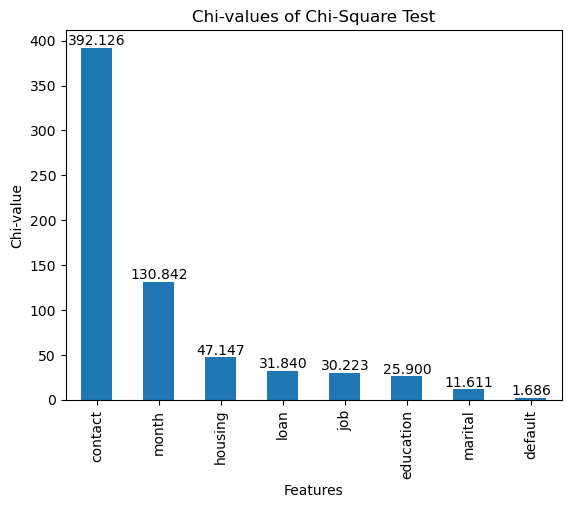

In [40]:
X_chi = df.drop(columns=['y'], axis=1)
y_chi = df['y']

create_chi_square_bar_plot(X_chi, y_chi, method='chi')

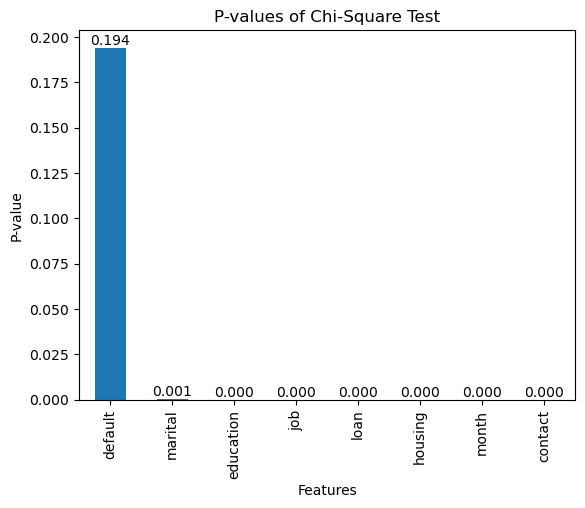

In [41]:
create_chi_square_bar_plot(X_chi, y_chi, method='p')

## 2. Remove unimportant features

In [44]:
features = list(X.columns)
non_important_features = ['default']
non_important_features_indecies = []
for feature in non_important_features:
    non_important_features_indecies.append(features.index(feature))

X_train_rescaled = np.delete(X_train_rescaled, non_important_features_indecies, axis=1)
X_test_rescaled = np.delete(X_test_rescaled, non_important_features_indecies, axis=1)

# Building The Model

## 1. General Model Building Function

In [55]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

def create_prediction_model(X_train, X_test, y_train, y_test, models):
    # TODO: Add "pipeline"
    results = []
    for model, params in models:
        print('🟡 START: ' + model.__name__)
        cv = GridSearchCV(model(), param_grid=params, cv=5)
        cv.fit(X_train, y_train)
        
        y_pred = cv.predict(X_test)
        
        # Metrics
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        best_params = cv.best_params_
        best_score = cv.best_score_
        
        print('🟢 END: ' + model.__name__)
        results.append({
            'model': {
                'instance': cv,
                'name': model.__name__
            },
            'metrics': {
                'f1': f1,
                'accuracy': accuracy,
                'roc_auc': roc_auc,
                'best_params': best_params,
                'best_score': best_score,
                'confusion_matrix': confusion_matrix(y_test, y_pred)
            }
        })
        
    return results

In [46]:
def tensorflow_f1_score(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    
    return f1

## 2. Bulding Models

### a. Tensorflow Models

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Define a list of learning rates to try
learning_rates = [0.001, 0.01, 0.1, 0.0001]

# Iterate over the learning rates
nn_results = []
for lr in learning_rates:
    print('## LR: ' + str(lr))
    # Define the model architecture
    model = Sequential([
        Dense(20, activation='relu', input_shape=(X_train_rescaled.shape[1],)),  # First hidden layer
        Dense(10, activation='relu'),  # Second hidden layer
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy', tensorflow_f1_score])

    # Train the model
    model.fit(X_train_rescaled, y_train, epochs=50, batch_size=32)
    
    y_pred = model.predict(X_test_rescaled)
    y_pred = y_pred >= 0.5
    print(y_pred)
    
    nn_results.append({
        'model': {
            'instance': model,
            'name': 'NN - LR: ' + str(lr)
        },
        'metrics': {
            'f1': f1_score(y_test, y_pred),
            'accuracy': accuracy_score(y_test, y_pred),
            'roc_auc': None,
            'best_params': None,
            'best_score': None,
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
    })


In [51]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(nn_results)

[   {   'metrics': {   'accuracy': 0.8748921484037964,
                       'best_params': None,
                       'best_score': None,
                       'confusion_matrix': array([[493,  87],
       [ 58, 521]], dtype=int64),
                       'f1': 0.877843302443134,
                       'roc_auc': None},
        'model': {   'instance': <keras.engine.sequential.Sequential object at 0x000002544DCC8D00>,
                     'name': 'NN - LR: 0.001'}},
    {   'metrics': {   'accuracy': 0.8559102674719585,
                       'best_params': None,
                       'best_score': None,
                       'confusion_matrix': array([[459, 121],
       [ 46, 533]], dtype=int64),
                       'f1': 0.8645579886455799,
                       'roc_auc': None},
        'model': {   'instance': <keras.engine.sequential.Sequential object at 0x000002544DAB8D90>,
                     'name': 'NN - LR: 0.01'}},
    {   'metrics': {   'accuracy': 0.86798964624

### b. Other Models

In [96]:
models = [
    (LogisticRegression, {'max_iter': [1000, 1500, 2000]}),
    (KNeighborsClassifier, {'n_neighbors': np.arange(2, 10, 1)}),
    (DecisionTreeClassifier, {'max_depth': np.arange(5, 10, 1)}),
    (RandomForestClassifier, {'n_estimators': np.arange(5, 10, 1)}),
    (xgb.XGBClassifier, {'n_estimators': [100, 150, 200], 'subsample': [0.8, 0.9, 1]})
]

In [97]:
other_results = create_prediction_model(
    X_train_rescaled,
    X_test_rescaled,
    y_train,
    y_test,
    models
)

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(other_results)

🟡 START: LogisticRegression
🟢 END: LogisticRegression
🟡 START: KNeighborsClassifier
🟢 END: KNeighborsClassifier
🟡 START: DecisionTreeClassifier
🟢 END: DecisionTreeClassifier
🟡 START: RandomForestClassifier
🟢 END: RandomForestClassifier
🟡 START: XGBClassifier
🟢 END: XGBClassifier
[   {   'metrics': {   'accuracy': 0.8766177739430544,
                       'best_params': {'max_iter': 1000},
                       'best_score': 0.8594896097632578,
                       'confusion_matrix': array([[499,  81],
       [ 62, 517]], dtype=int64),
                       'f1': 0.8785046728971964,
                       'roc_auc': 0.8766318265737597},
        'model': {   'instance': GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [1000, 1500, 2000]}),
                     'name': 'LogisticRegression'}},
    {   'metrics': {   'accuracy': 0.7540983606557377,
                       'best_params': {'n_neighbors': 9},
                       'best_score': 0.72609476

## 3. Confusion Matrix

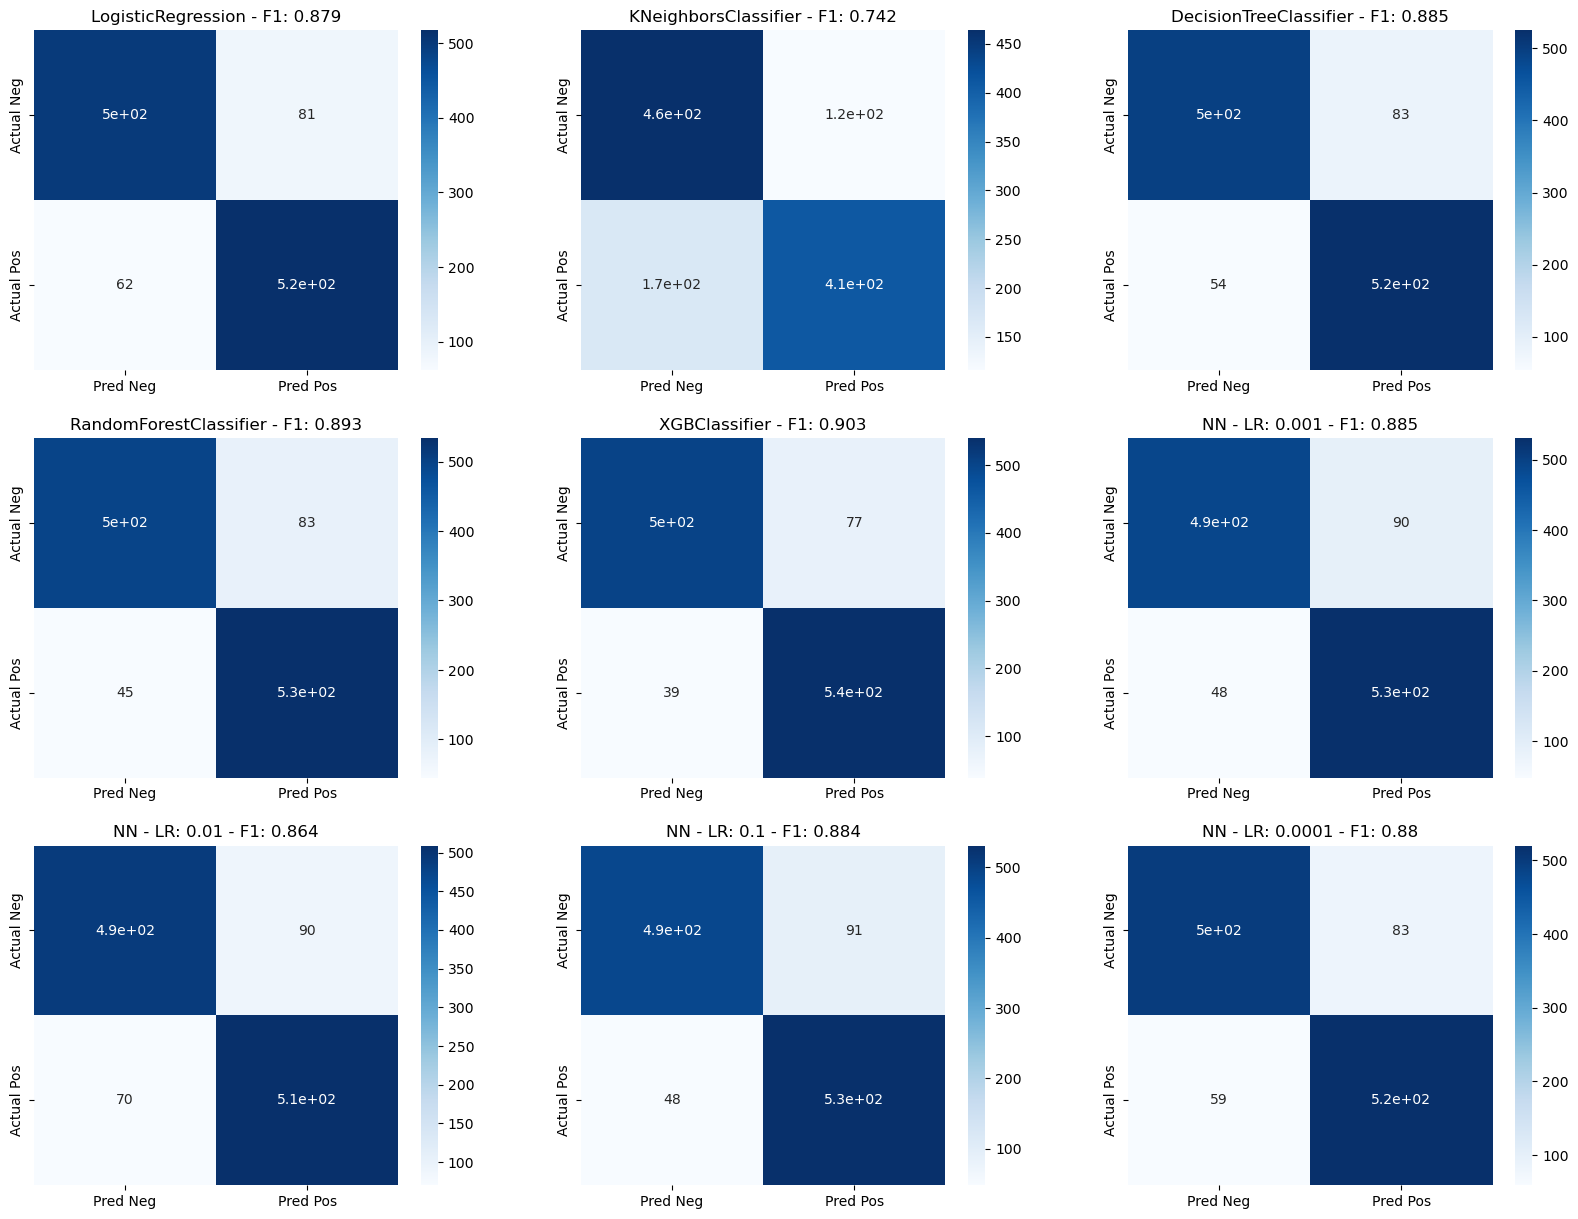

In [98]:
import math

columns_count = 3
all_results = other_results + nn_results
fig, axes = plt.subplots(nrows=math.ceil(len(all_results) / columns_count), ncols=columns_count, figsize=(20, 15))
for index, result in enumerate(all_results):
    ax = axes[index // columns_count, index % columns_count]

    sns.heatmap(result['metrics']['confusion_matrix'], ax=ax, annot=True, cmap='Blues')
    
    ax.set_title(result['model']['name'] + ' - F1: ' + str(round(result['metrics']['f1'], 3)))
    ax.xaxis.set_ticklabels(['Pred Neg', 'Pred Pos'])
    ax.yaxis.set_ticklabels(['Actual Neg', 'Actual Pos'])

plt.show()